In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_excel("/content/sample_data/BandcampSales.xlsx")


In [66]:
df.head()

,_id,item_type,country_code,country,item_description,artist_name,currency,amount_paid_usd
0,159968,digital albums,gb,United Kingdom,Live at Vicar Street,Girl Band,USD,9.99
1,159968,digital albums,fi,Finland,Neurogen,Jirah,GBP,1.30
2,159968,digital albums,fi,Finland,The Last Snare Bender,D-Ther,GBP,3.90
3,159968,physical items,gb,United Kingdom,Limited Edition Compact Disc,WHITE NOISE TV,EUR,12.39
4,159968,digital tracks,us,United States,O Ruthless Great Divine Director,LINGUA IGNOTA,USD,1.00


In [5]:
# Menampilkan tipe data setiap kolom
print(df.dtypes)

_id                 object
item_type           object
country_code        object
country             object
slug_type           object
item_description    object
art_id              object
amount_paid         object
artist_name         object
currency            object
album_title         object
amount_paid_usd     object
dtype: object


In [26]:
# Menghapus karakter selain angka dan titik (.) serta mengganti string kosong dengan NaN
df['amount_paid_usd'] = df['amount_paid_usd'].replace('[^0-9.]+', '', regex=True).replace('', float('nan'))

# Mengubah tipe data kolom 'amount_paid_usd' menjadi float
df['amount_paid_usd'] = pd.to_numeric(df['amount_paid_usd'], errors='coerce')



In [30]:
# Menghapus kolom 'art_id'
df = df.drop('art_id', axis=1)

In [32]:
df = df.drop('slug_type', axis=1)
df = df.drop('album_title', axis=1)

In [33]:
df = df.drop('amount_paid', axis=1)

In [34]:
# Mengubah nilai 'a' menjadi 'digital albums'
df['item_type'] = df['item_type'].replace('a', 'digital albums')

# Mengubah nilai 'p' menjadi 'physical items'
df['item_type'] = df['item_type'].replace('p', 'physical items')

# Mengubah nilai 't' menjadi 'digital tracks'
df['item_type'] = df['item_type'].replace('t', 'digital tracks')

# Menampilkan DataFrame setelah perubahan
df.head()








,_id,item_type,country_code,country,item_description,artist_name,currency,amount_paid_usd
0,1599688803.5175&//girlbanddublin.bandcamp.com/...,digital albums,gb,United Kingdom,Live at Vicar Street,Girl Band,USD,9.99
1,1599688805.27838&//maharettarecords.bandcamp.c...,digital albums,fi,Finland,Neurogen,Jirah,GBP,1.30
2,1599688805.90646&//maharettarecords.bandcamp.c...,digital albums,fi,Finland,The Last Snare Bender,D-Ther,GBP,3.90
3,1599688806.94234&//alicesitski.bandcamp.com/al...,physical items,gb,United Kingdom,Limited Edition Compact Disc,WHITE NOISE TV,EUR,12.39
4,1599688809.07942&//linguaignota.bandcamp.com/t...,digital tracks,us,United States,O Ruthless Great Divine Director,LINGUA IGNOTA,USD,1.00


In [35]:
# Save the DataFrame to an Excel file
df.to_excel('output.xlsx', index=False)

In [38]:
# Menghitung jumlah data dengan nilai '0' atau NaN pada kolom 'amount_type_usd'
count = df['amount_paid_usd'].isnull().sum() + (df['amount_paid_usd'] == 0).sum()

# Menampilkan jumlah data
print("Jumlah data dengan nilai '0' atau NaN pada kolom 'amount_paid_usd':", count)

Jumlah data dengan nilai '0' atau NaN pada kolom 'amount_paid_usd': 34


In [40]:
# Menghapus baris dengan nilai NaN pada kolom 'amount_type_usd'
df = df.dropna(subset=['amount_paid_usd'])

# Menghapus baris dengan nilai '0' pada kolom 'amount_type_usd'
df = df.query("amount_paid_usd != 0")

In [62]:
# Menampilkan data pada kolom 'paid_amount_usd' yang lebih dari 100
df_greater_than_100 = df.loc[df['amount_paid_usd'] > 10000]

# Menampilkan DataFrame dengan data yang lebih dari 10000
df_greater_than_100

,_id,item_type,country_code,country,item_description,artist_name,currency,amount_paid_usd


In [53]:

# Menghapus data setelah karakter ke-6 pada kolom '_id'
df['_id'] = df['_id'].str[:6]



In [58]:
# Memfilter data pada kolom 'amount_paid_usd' yang lebih dari 1000
df_filtered = df.loc[df['amount_paid_usd'] > 10000]

# Membagi nilai pada kolom 'amount_paid_usd' dengan 10,000,000 hanya pada data yang lebih dari 1000
df_filtered['amount_paid_usd'] = df_filtered['amount_paid_usd'] / 10000000

# Menampilkan DataFrame setelah pembagian
df_filtered

,_id,item_type,country_code,country,item_description,artist_name,currency,amount_paid_usd
751689,160129,digital tracks,fr,France,Mystery Plane,NaN,Various Artists: Cold Waves of Color,21.981199
891127,160159,physical items,es,Spain,LP,Goldfinger Doe & B.M.S.,EUR,1.979202


In [61]:
# Mengupdate data pada DataFrame lama dengan DataFrame hasil filter
df.update(df_filtered)

# Menampilkan DataFrame lama setelah diupdate
df.head()

,_id,item_type,country_code,country,item_description,artist_name,currency,amount_paid_usd
0,159968,digital albums,gb,United Kingdom,Live at Vicar Street,Girl Band,USD,9.99
1,159968,digital albums,fi,Finland,Neurogen,Jirah,GBP,1.30
2,159968,digital albums,fi,Finland,The Last Snare Bender,D-Ther,GBP,3.90
3,159968,physical items,gb,United Kingdom,Limited Edition Compact Disc,WHITE NOISE TV,EUR,12.39
4,159968,digital tracks,us,United States,O Ruthless Great Divine Director,LINGUA IGNOTA,USD,1.00


In [63]:
# Save the DataFrame to an Excel file
df.to_excel('output.xlsx', index=False)

In [64]:
pip install pillow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Image format: PNG
Image mode: RGBA
Image size: (1199, 1699)


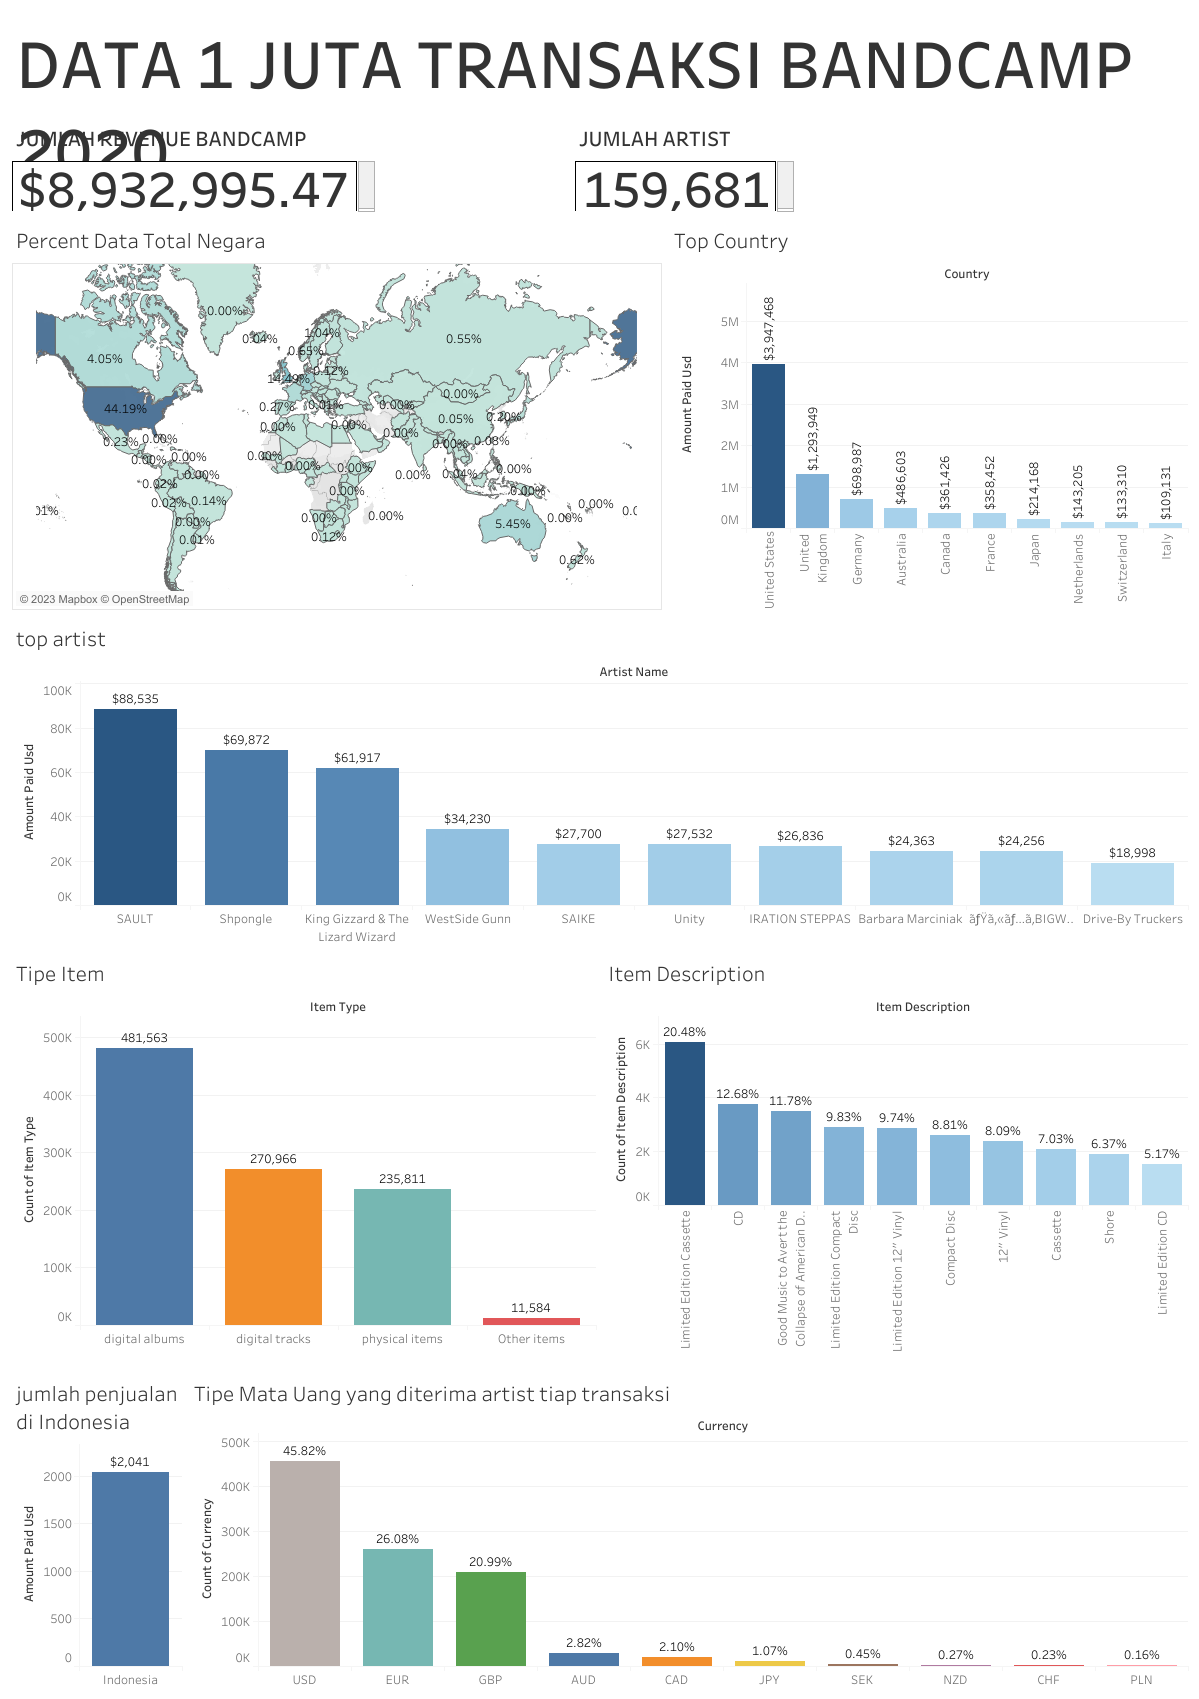

In [65]:
#after clean the data, i make a dashboard in TABLEAU
from PIL import Image

# Open the PNG image
image = Image.open('/content/Dashboard 1 (1).png')

# Display image information
print("Image format:", image.format)
print("Image mode:", image.mode)
print("Image size:", image.size)

# Show the image
image.show()